# Aufgabe 1: Auswertung Gravimetrieprofil zur Kontrolle

Der folgende Programmcode wertet die Daten aus Aufgabe 1 aus und plottet die Freiluft- und die Bougueranomalie. 

**Die hier dargestellten Ergebnisse dienen lediglich zur Kontrolle Ihrer Auswertungsergebnisse.** 


In [1]:
# All data 
import numpy as np
import matplotlib.pyplot as plt

def solve_model(t,x,h,phi,g_obs,rho):
    ns = len(t)
    G=6.67508e-11
    g_absolut = 981141.91;# % mGal
    ge = 9.780326771; 
    alpha = 0.001931851 ; 
    beta = 0.00669438; 
    g_drift = (g_obs[ns-1]-g_obs[0])/(t[ns-1]-t[0]);# %mGal/min
    delta_g_obs = g_obs - g_obs[0] - g_drift*(t-t[0]); #%mGal
    g0 = (ge*(1+alpha*np.sin(np.deg2rad(phi))**2)/np.sqrt((1-beta*np.sin(np.deg2rad(phi))**2))) * 100 * 10**3;# % mGal
    delta_gL = g0 - g_absolut; 
    delta_gF = -.3086*h; 
    delta_gB = 2*np.pi*G*rho*h*10**5; 
    Delta_gF = delta_g_obs - delta_gL - delta_gF
    Delta_gB = delta_g_obs - delta_gL - delta_gF - delta_gB 
    return [Delta_gF,Delta_gB]



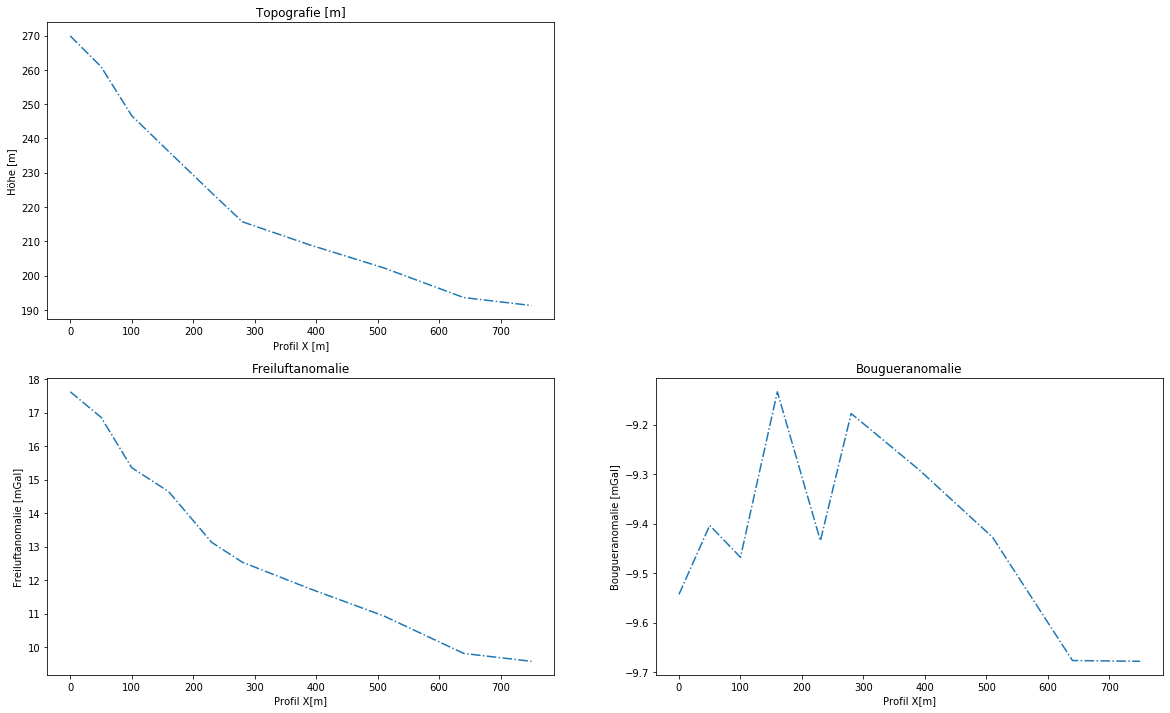

In [3]:
# Daten aus Aufgabe 1

minute = np.array([44,50,56,3,8,12,16,21,25,29,44])
hour = np.array([14,14,14,15,15,15,15,15,15,15,15])
x = np.array([0,50,100,160,230,280,390,510,640,750,0])
h = np.array([269.91,260.97,246.64,236.22,224.15,215.69,208.93,202.24,193.59,191.27,269.91])
phi = np.array([51.5462,51.5458,51.5460,51.5458,51.5455,51.5450,51.5442,51.5435,51.5433,51.5432,51.5462])
g_obs = np.array([4485.21,4487.17,4490.10,4492.58,4494.76,4496.73,4497.95,4499.14,4500.67,4501.14,4485.18])

rho = 2400; 


## Den folgenden Programmcode bitte nicht ändern!

t = hour*60 + minute
[Delta_gF,Delta_gB] = solve_model(t,x,h,phi,g_obs,rho)
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(x[:-1],h[:-1],'-.')
plt.xlabel('Profil X [m]')
plt.ylabel('Höhe [m]')
plt.title('Topografie [m]')
plt.subplot(2,2,3)
plt.plot(x[:-1],Delta_gF[:-1],'-.')
plt.xlabel('Profil X[m]')
plt.ylabel('Freiluftanomalie [mGal]')
plt.title('Freiluftanomalie')
plt.subplot(2,2,4)
plt.plot(x[:-1],Delta_gB[:-1],'-.')
plt.xlabel('Profil X[m]')
plt.ylabel('Bougueranomalie [mGal]')
plt.title('Bougueranomalie')

plt.show()

